### NLP - Sentiment140

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import warnings as wr
wr.filterwarnings('ignore')


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
# To see most positive & negative word distribution
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


True

In [30]:
# task 1: load Data
def load_data(file_path):
    df = pd.read_csv(file_path, header=None,
                    encoding='latin-1', names=['target','id','date','meta',
                                              'user', 'text'])
    df['sentiment'] = df['target'].apply(lambda x: 'positive' if x==4 else 'negative')
    df.drop(columns=['id','date','meta','user'], inplace=True)
    
    return df
file_path = 'sentiment140.csv'
df = load_data(file_path)


In [31]:
# Show
df.head()

,target,text,sentiment
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,0,is upset that he can't update his Facebook by ...,negative
2,0,@Kenichan I dived many times for the ball. Man...,negative
3,0,my whole body feels itchy and like its on fire,negative
4,0,"@nationwideclass no, it's not behaving at all....",negative


### Descriptive Statistics

In [7]:
# Sample size
num_pos = len(df[df['sentiment']=='positive'])
num_neg = len(df[df['sentiment']=='negative'])
print(num_pos, num_neg)

800000 800000


Its a balanced Dataset

In [9]:
# Average length of text
avg_len = df['text'].apply(lambda x: len(x.split())).mean()  # average lenght
df['text_len'] = df['text'].apply(lambda x: len(x.split()))  # add new col text_length

In [10]:
print(avg_len)

13.176150625


In [11]:
df.head()

,target,text,sentiment,text_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,19
1,0,is upset that he can't update his Facebook by ...,negative,21
2,0,@Kenichan I dived many times for the ball. Man...,negative,18
3,0,my whole body feels itchy and like its on fire,negative,10
4,0,"@nationwideclass no, it's not behaving at all....",negative,21


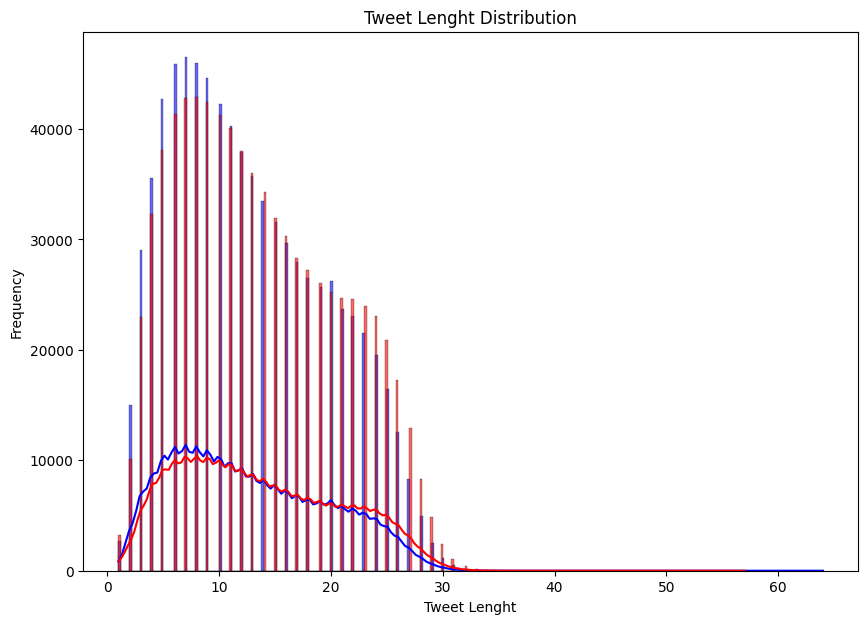

In [12]:
# Distribution
plt.figure(figsize=(10,7))
sns.histplot(df[df['sentiment']=='positive']['text_len'], kde=True, color='blue', label='positive', alpha=0.6)
sns.histplot(df[df['sentiment']=='negative']['text_len'], kde=True, color='red', label='negative',alpha = 0.6)
plt.xlabel('Tweet Lenght')
plt.ylabel('Frequency')
plt.title('Tweet Lenght Distribution')
plt.show()

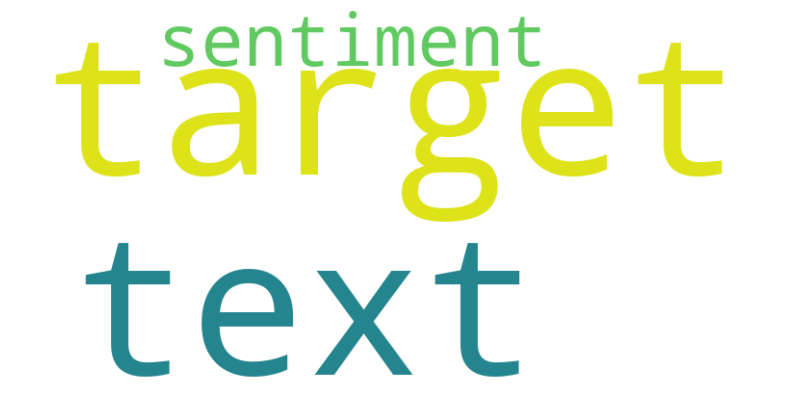

In [17]:
# Combine all text data into a single corpus
corpus = ' '.join(df)

# Tokenize the text
tokens = nltk.word_tokenize(corpus)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Count word frequencies
word_freq = Counter(filtered_tokens)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Correct one

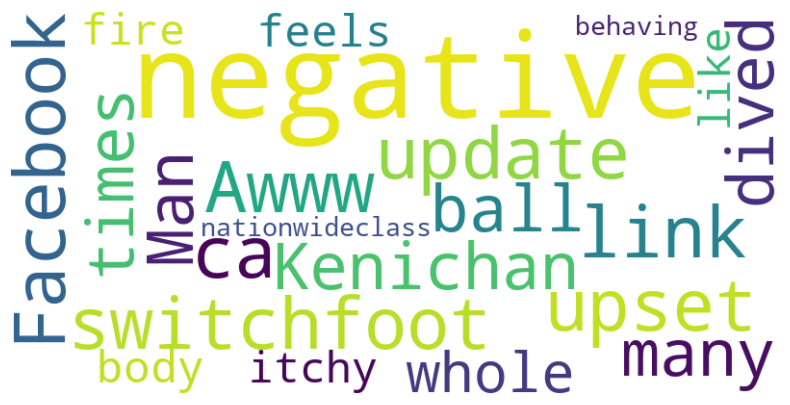

In [25]:
# Sample text data  
text_data = [
    "@switchfoot [link] - Awww, t ... negative",
    "is upset that he can't update his Facebook by ... negative",
    "@Kenichan I dived many times for the ball. Man ... negative",
    "my whole body feels itchy and like its on fire negative",
    "@nationwideclass no, it's not behaving at all negative"
]

# Combine all text data into a single corpus
corpus = ' '.join(text_data)


# Tokenize the text
tokens = nltk.word_tokenize(corpus)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Count word frequencies
word_freq = Counter(filtered_tokens)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### Most Common Word Distribution

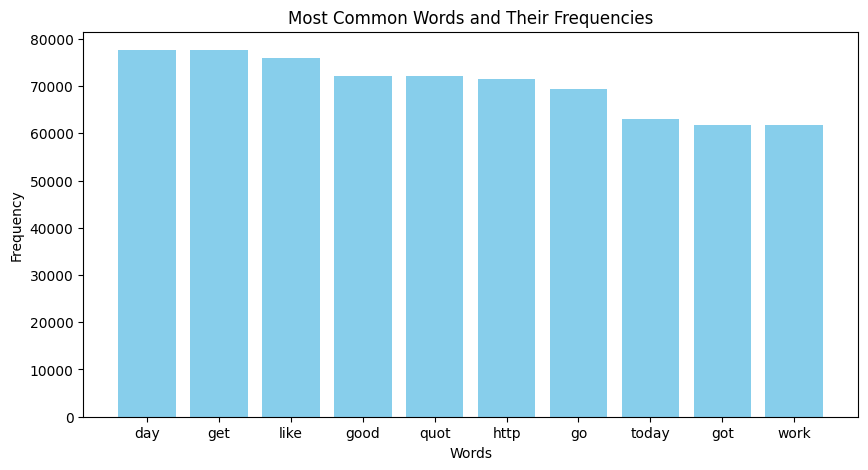

In [18]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Combine all text data into a single corpus
corpus = ' '.join(df['text'])

# Tokenize the text
tokens = nltk.word_tokenize(corpus)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Count word frequencies
word_freq = Counter(filtered_tokens)

# Get the most common words
most_common_words = word_freq.most_common(10)

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the word frequencies
plt.figure(figsize=(10, 5))
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words and Their Frequencies')
plt.show()


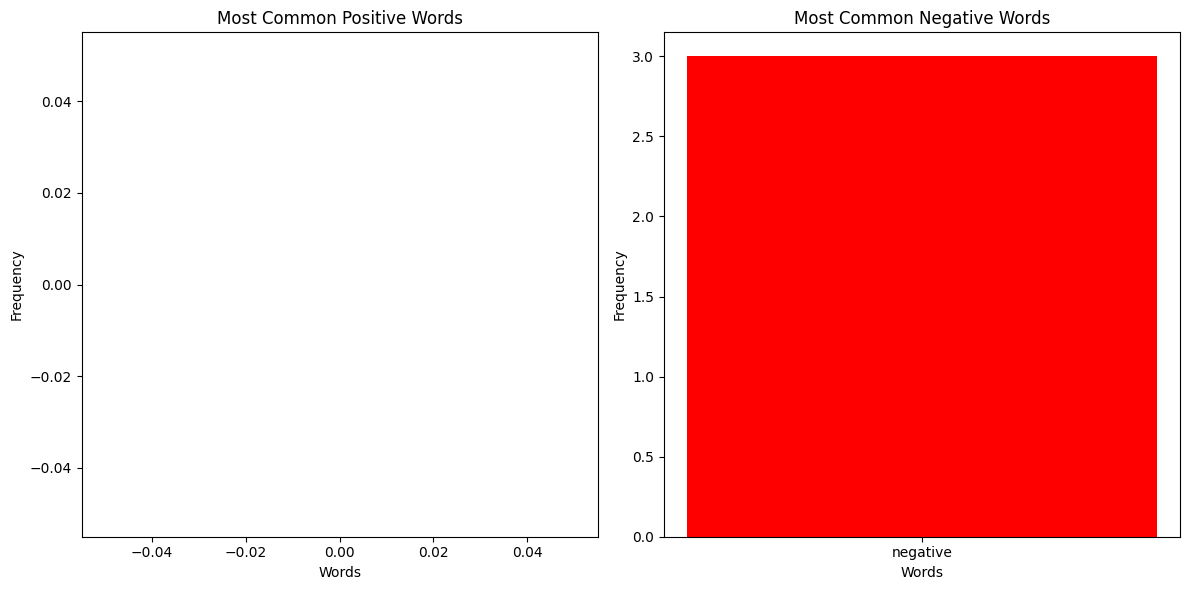

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # to get sentiment scores for each word.
from collections import Counter

# Sample DataFrame
data = {
    'target': ['@switchfoot', '@Kenichan', '@nationwideclass'],
    'text': [
        'http://twitpic.com/2y1zl - Awww, t ... negative',
        'I dived many times for the ball. Man ... negative',
        'no, it\'s not behaving at all negative'
    ],
    'sentiment': ['negative', 'negative', 'negative'],
    'text_len': [50, 45, 40]
}

df = pd.DataFrame(data)

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis on the text column
df['scores'] = df['text'].apply(get_sentiment_scores)

# Extract positive and negative words
positive_words = []
negative_words = []

stop_words = set(stopwords.words('english'))

for text in df['text']:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.isalpha() and word.lower() not in stop_words]
    for word in filtered_words:
        score = sia.polarity_scores(word)
        if score['compound'] >= 0.5:
            positive_words.append(word)
        elif score['compound'] <= -0.5:
            negative_words.append(word)

# Count word frequencies
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# Get the most common positive and negative words
most_common_positive = positive_word_freq.most_common(10)
most_common_negative = negative_word_freq.most_common(10)

# Convert to DataFrame for visualization
positive_df = pd.DataFrame(most_common_positive, columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(most_common_negative, columns=['Word', 'Frequency'])

# Plot the word frequencies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(positive_df['Word'], positive_df['Frequency'], color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Positive Words')

plt.subplot(1, 2, 2)
plt.bar(negative_df['Word'], negative_df['Frequency'], color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Negative Words')

plt.tight_layout()
plt.show()


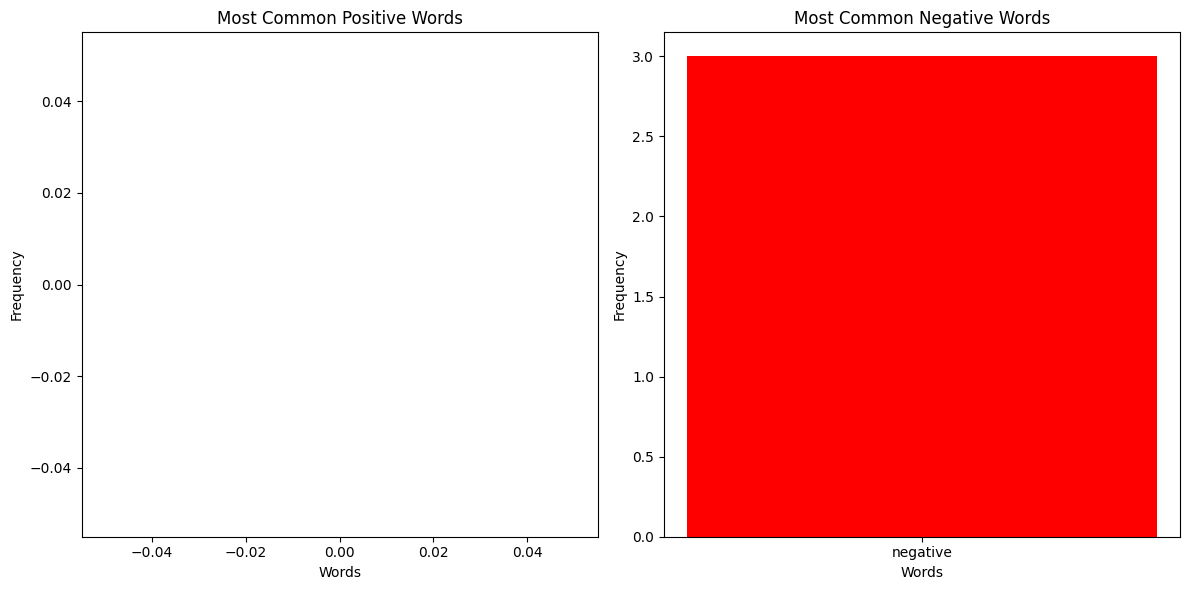

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer # to get sentiment scores for each word.
from collections import Counter

# Sample DataFrame
data = {
    'target': ['@switchfoot', '@Kenichan', '@nationwideclass'],
    'text': [
        'http://twitpic.com/2y1zl - Awww, t ... negative',
        'I dived many times for the ball. Man ... negative',
        'no, it\'s not behaving at all negative'
    ],
    'sentiment': ['negative', 'negative', 'negative'],
    'text_len': [50, 45, 40]
}

df = pd.DataFrame(data)

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis on the text column
df['scores'] = df['text'].apply(get_sentiment_scores)

# Extract positive and negative words
positive_words = []
negative_words = []

stop_words = set(stopwords.words('english'))

for text in df['text']:
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.isalpha() and word.lower() not in stop_words]
    for word in filtered_words:
        score = sia.polarity_scores(word)
        if score['compound'] >= 0.5:
            positive_words.append(word)
        elif score['compound'] <= -0.5:
            negative_words.append(word)

# Count word frequencies
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# Get the most common positive and negative words
most_common_positive = positive_word_freq.most_common(10)
most_common_negative = negative_word_freq.most_common(10)

# Convert to DataFrame for visualization
positive_df = pd.DataFrame(most_common_positive, columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(most_common_negative, columns=['Word', 'Frequency'])

# Plot the word frequencies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(positive_df['Word'], positive_df['Frequency'], color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Positive Words')

plt.subplot(1, 2, 2)
plt.bar(negative_df['Word'], negative_df['Frequency'], color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Negative Words')

plt.tight_layout()
plt.show()


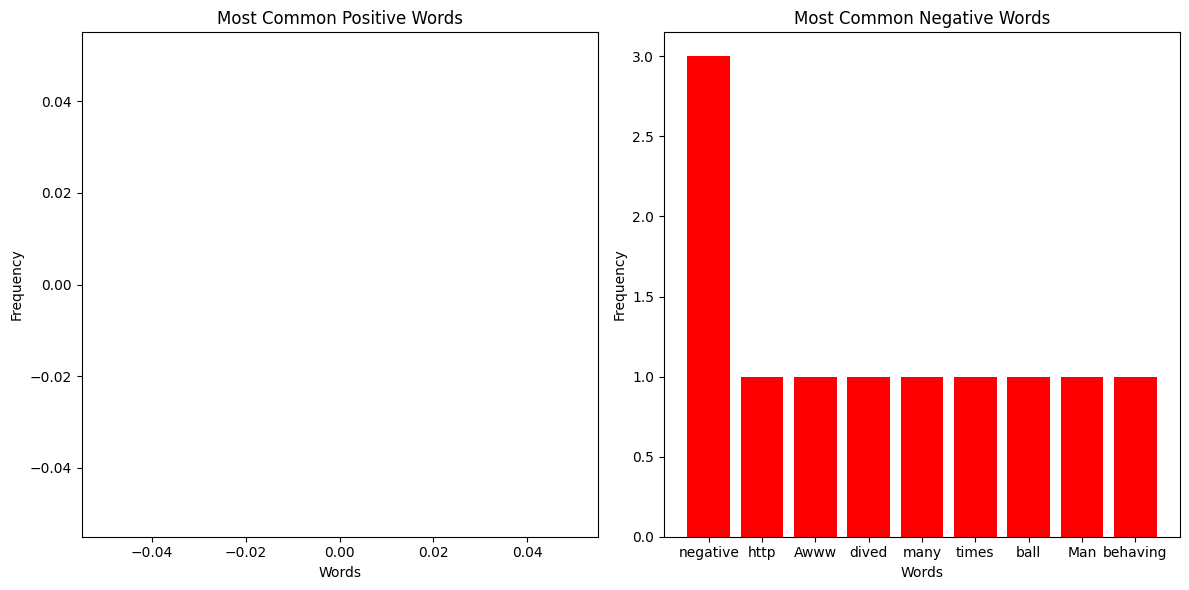

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

# Sample DataFrame
data = {
    'target': ['@switchfoot', '@Kenichan', '@nationwideclass'],
    'text': [
        'http://twitpic.com/2y1zl - Awww, t ... negative',
        'I dived many times for the ball. Man ... negative',
        'no, it\'s not behaving at all negative'
    ],
    'sentiment': ['negative', 'negative', 'negative'],
    'text_len': [50, 45, 40]
}

df = pd.DataFrame(data)

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis on the text column
df['scores'] = df['text'].apply(get_sentiment_scores)
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])

# Separate positive and negative sentences
positive_sentences = df[df['compound'] > 0]['text']
negative_sentences = df[df['compound'] < 0]['text']

# Tokenize and filter words
stop_words = set(stopwords.words('english'))

def tokenize_and_filter(sentences):
    words = []
    for text in sentences:
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]
        words.extend(filtered_tokens)
    return words

positive_words = tokenize_and_filter(positive_sentences)
negative_words = tokenize_and_filter(negative_sentences)

# Count word frequencies
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# Get the most common positive and negative words
most_common_positive = positive_word_freq.most_common(10)
most_common_negative = negative_word_freq.most_common(10)

# Convert to DataFrame for visualization
positive_df = pd.DataFrame(most_common_positive, columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(most_common_negative, columns=['Word', 'Frequency'])

# Plot the word frequencies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(positive_df['Word'], positive_df['Frequency'], color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Positive Words')

plt.subplot(1, 2, 2)
plt.bar(negative_df['Word'], negative_df['Frequency'], color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Negative Words')

plt.tight_layout()
plt.show()


### Most Common `Postive` & `Negative` Words Vasualization - Visualization - Bar (Time Consuming)

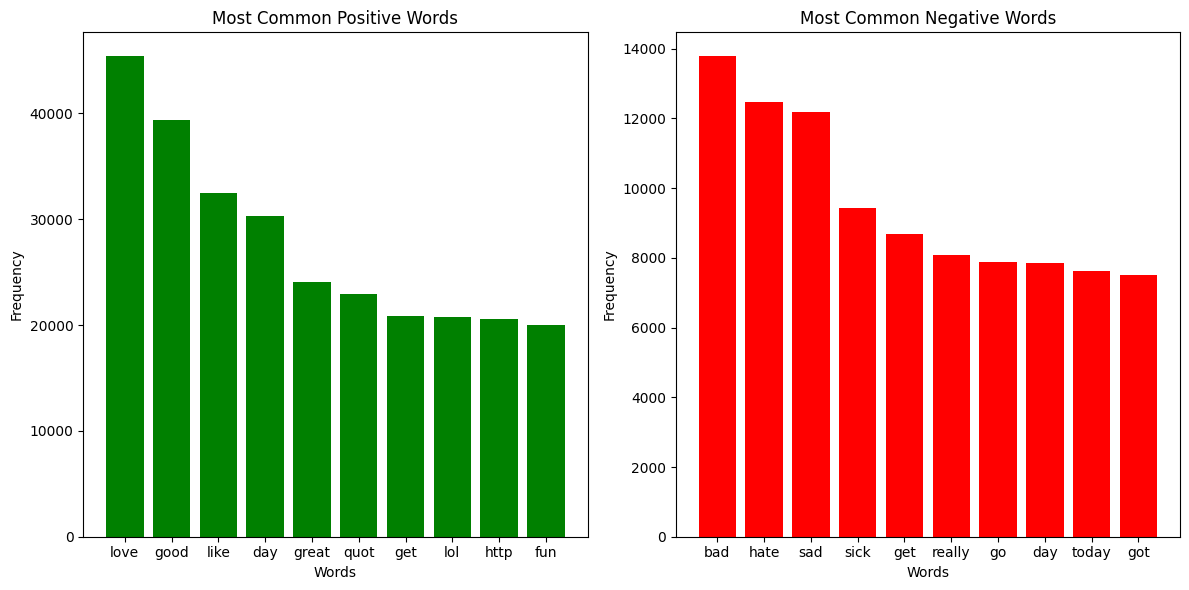

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # to get sentiment scores for each sentence
from collections import Counter

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis on the text column
df['scores'] = df['text'].apply(get_sentiment_scores)
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])

# Separate positive and negative sentences
positive_sentences = df[df['compound'] >= 0.5]['text']
negative_sentences = df[df['compound'] <= -0.5]['text']

# Tokenize and filter words
stop_words = set(stopwords.words('english'))

def tokenize_and_filter(sentences):
    words = []
    for text in sentences:
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]
        words.extend(filtered_tokens)
    return words

positive_words = tokenize_and_filter(positive_sentences)
negative_words = tokenize_and_filter(negative_sentences)

# Count word frequencies
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# Get the most common positive and negative words
most_common_positive = positive_word_freq.most_common(10)
most_common_negative = negative_word_freq.most_common(10)

# Convert to DataFrame for visualization
positive_df = pd.DataFrame(most_common_positive, columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(most_common_negative, columns=['Word', 'Frequency'])

# Plot the word frequencies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(positive_df['Word'], positive_df['Frequency'], color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Positive Words')

plt.subplot(1, 2, 2)
plt.bar(negative_df['Word'], negative_df['Frequency'], color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Negative Words')

plt.tight_layout()
plt.show()


### Most Common `Postive` & `Negative` Words Vasualization - Visualization - `Word Cloud`

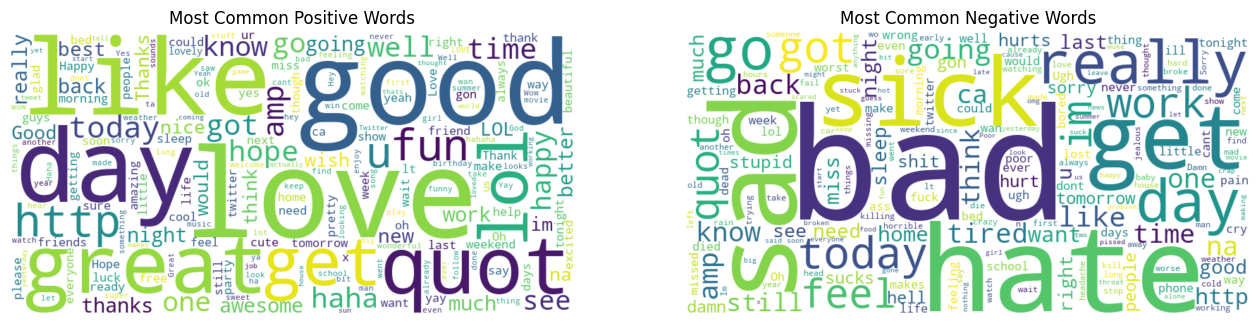

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_freq)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_freq)

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Positive Words')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Negative Words')

plt.show()
